# Forecasting with Regressions

Problem:
* Given the history of a metric, predict future values.
* Inherently impossible.
* Need strong assumptions about regularities (i.e. model).
* Measure the goodness of fit

Application: Capacity planning.

* How much ressources will I need tomorrow?
* Usually covered by simple regression methods
  - linear growth
  - exponential growth

# Baseline: Slope Method

https://nbviewer.jupyter.org/github/circonus-labs/caql-handbook/blob/master/7.%20Forecasting%20Data.ipynb

# Regression Method

* Parametric Ansatz for $f(t) = f(\theta; t)$

* Define residuals $e_i$ by:

$$x_i = f(\theta; t_i) + e_i$$

* Loss function:

$$ Loss(\theta) = \sum_i e_i^2 = \sum_i (y_i - f(\theta;t_i))^2 $$ 

* Chosse $\hat{\theta}$ by minimizing $Loss(\theta)$.

* A _goodness of fit_ measure is the minimal loss $MinLoss=Loss(\hat{\theta})$

## All is Loss!

http://heinrichhartmann.com/blog/all-is-loss.html

## Warmup: Constant Model

* Parametric Ansatz for f: $f(x) = a$, constant.
* Quadratic loss function:

$$ Loss(a) = \sum_i (y_i - a)^2 $$

* Minimize loss function (_using calculus!_) gives __mean value__:

$$ \hat{a} = \frac{1}{n} \sum_i y_i = \mu_Y $$



$$ MinLoss(X,Y) = \sum_i (y_i - \mu_Y)^2 = n \cdot Var(Y) $$

* $Var(Y)$ measures goodness of constant fit!


## Simple Linear Regression 

* Parametric Ansatz for f:
  $$f(a,b; t) = bt + a, \quad \theta=(a,b)$$

* Quadratic loss function:

$$ Loss(a,b) = \sum_i e_i^2 = \sum_i (y_i - f(t_i))^2 =  \sum_i (y_i - b t_i - a)^2 $$ 

$$ = a^2 A + ab \cdot B + b^2 \cdot C + D$$

for some variables $A,B,C,D$ depending on $X,Y$.

* Regression: Minimize $Loss(a,b)$ with respect to parameters $(a,b)$.

* Since $Loss(a,b)$ is quadratic, it has a unique minimum which is easy to compute:

$$\hat{b} =  \frac{\sum_i (x_i - \mu_x)(y_i - \mu_y)}{\sum_i(x_i - \mu_x)^2} = Cov(X,Y) / Var(X) = \rho_{X,Y} \frac{\sigma_Y}{\sigma_X}$$

$$\hat{a} = \mu_Y - \hat{b} \mu_X $$

Remarks:

* See (http://en.wikipedia.org/wiki/Simple_linear_regression) for a derivation.

* Works also for more complex functions (e.g. polynomials)

* Name "linear" regression comes from "quadratic" (!) loss function.

* Note that Pearson Correlation appears in formula for $\hat{b}$.

In [1]:
import math
import random
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
mpl.rcParams['figure.figsize'] = (15,5)
%matplotlib inline
X = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]

model = 0.126045234878848 + 0.6781584888149065 * x


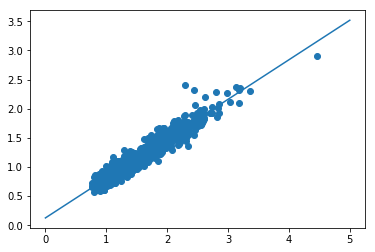

In [2]:
# Library Function for linear regression:
#
# stats.linregress?
#

# Request rates to nodes in a cluster
X = np.loadtxt("../datasets/ReqMultiNode.csv", delimiter=',', usecols=(0,1,2,3,4,5))[:1000]
T, A, B, C, D, E = X.T

from scipy import stats
b, a, r_value, p_value, std_err = stats.linregress(A,B)

print("model = {} + {} * x".format(a,b))

grid = [0,1,2,3,4,5]
f    = lambda x: a + b*x

plt.scatter(A,B)
plt.plot(grid, list(map(f, grid)))

## Goodness of fit

* Natural measure for goodness of fit is the Loss of the ideal fit viewed as a function of $X$ and $Y$:

$$ MinLoss(X,Y) = \sum_i (y_i - \hat{b} x_i - \hat{a})^2 $$

* Problem: Scales (quadratic) with $Y$: $MinLoss(X,3 Y)=9 MinLoss(Y)$ without the regression getting better or worse. 

* Use loss of constant regression (ie. mean value):

  $$ ConstLoss(Y) = \sum_i (y_i - \mu_y)^2  = n \cdot Var(Y) $$
  
**Def:** The $R^2-Value$ value is

$$ R^2 = 1 - \frac{MinLoss(X,Y)}{ConstLoss(Y)}$$

* Lies in [0,1].
* Perfect fit if $R^2=1$

* Scaling invariance: Does not change when $X,Y$ is replaced by $a X, b Y$.

* Can be viewed as variance ratio $SS_{reg} / SS_{tot}$.
  http://en.wikipedia.org/wiki/Coefficient_of_determination

**Proposition:**

$$ R^2 = \frac{Cov(X,Y)^2}{Var(X) \cdot Var(Y)} = (\frac{Cov(X,Y)}{\sigma_X \cdot \sigma_Y})^2$$

By Cauchy-Schwary inequality we have $0\leq \rho^2 \leq 1$.

The (Pearson) _correlation_ $\rho = \sqrt{R^2}$ is defined as measures how well a linear model fits the plot.

# Examples

## Linear regression on memory usage

* detemine time to run out of ressources
* read off: annual growth (negative in this case)
* read off: R2 value

<figure>
<img src="../img/example-memory-usage.png">
<figcaption>Linear memory forecast.</figcaption>
</figure>

* share: https://share.circonus.com/shared/graphs/86d2480c-7729-4a97-bcde-f95ed997aedf/ngagXt#no-set  

## Exponential regression

Use a different Model

$$f(t) = exp(a \cdot t + b)$$

Trick: Use log to reduce to linear case.

* Forecast exponential growth
* Compute Compound Annual Growth rate

<figure>
<img src="../img/example_exp_forecast.png">
<figcaption>Exponential user-statistics forecast.</figcaption>
</figure>